# Lets Grow More (LGMVIP)

#  Task 1: IRIS FLOWER CLASSIFICATION 

# Name : Kiran Hasabe

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

# Import all the required libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Import Data set

In [4]:
data=pd.read_csv(r"C:\Downloads\Iris data.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Exploring data

In [5]:
data.shape

(150, 6)

In [6]:
data.size

900

In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Obtaining Description/Summary Dataframe

In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Taking required numerical data into anoter dataframe

In [12]:
data_df=data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]  #choosing ftures having numerical data
data_df.sample(5) #viewing random 5 records from dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
45,4.8,3.0,1.4,0.3
138,6.0,3.0,4.8,1.8
123,6.3,2.7,4.9,1.8
52,6.9,3.1,4.9,1.5
129,7.2,3.0,5.8,1.6


# DATA VISUALIZATION

# Pair plot

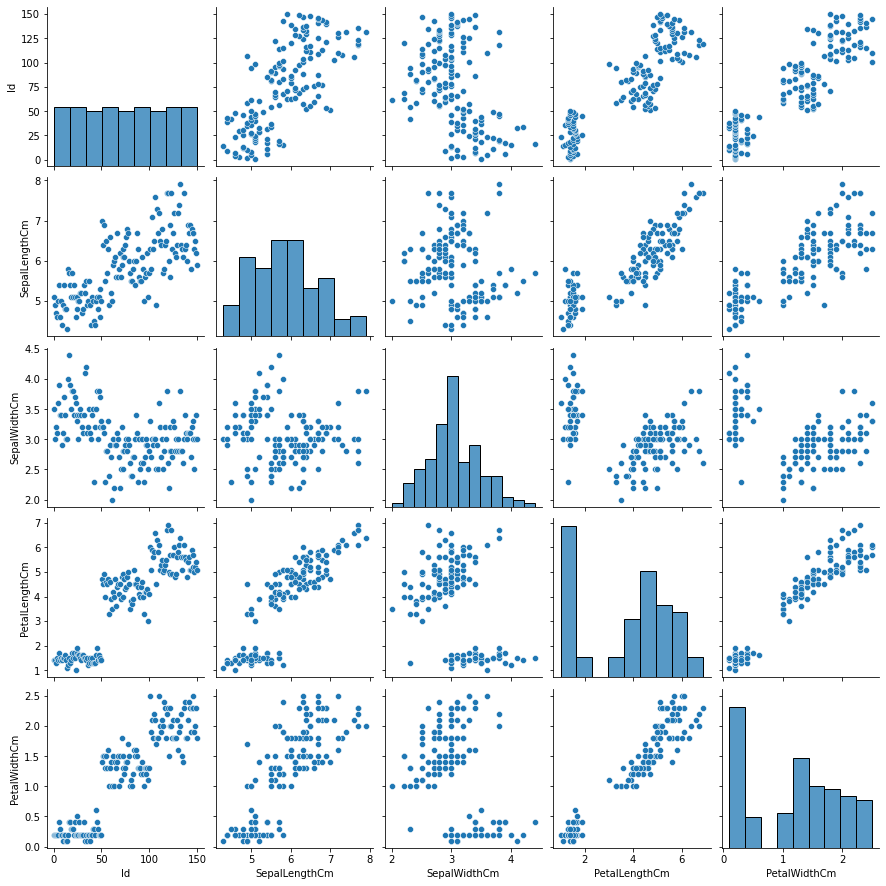

In [13]:
sns.pairplot(data)

C:\ProgramData\Anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


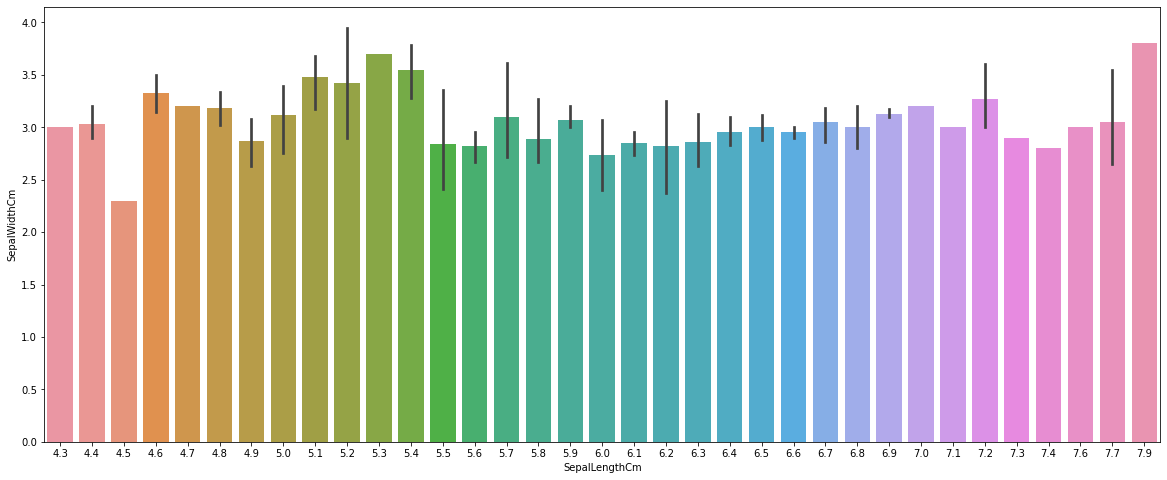

In [14]:
plt.figure(figsize=(20,8))
sns.barplot(data['SepalLengthCm'],data['SepalWidthCm'])
plt.show()

C:\ProgramData\Anaconda2\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

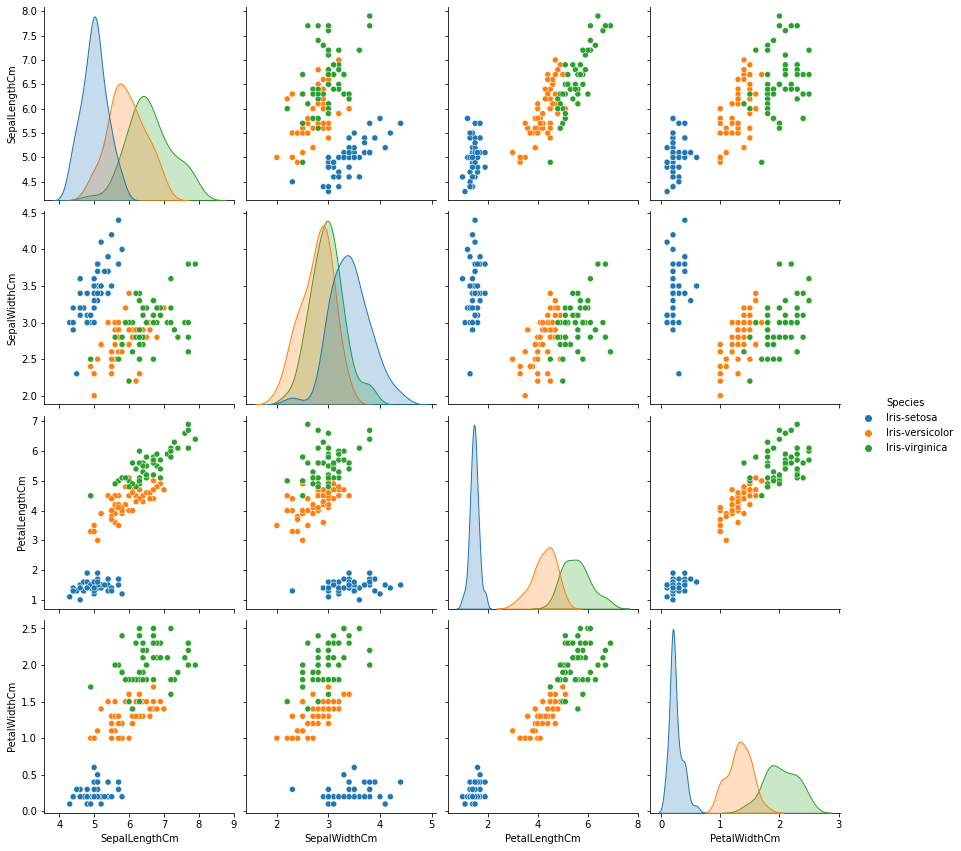

In [15]:
m=data.drop(['Id'],axis=1)
plt.figure(figsize=(10,10))
sns.pairplot(m,hue='Species',size=3)

In [16]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

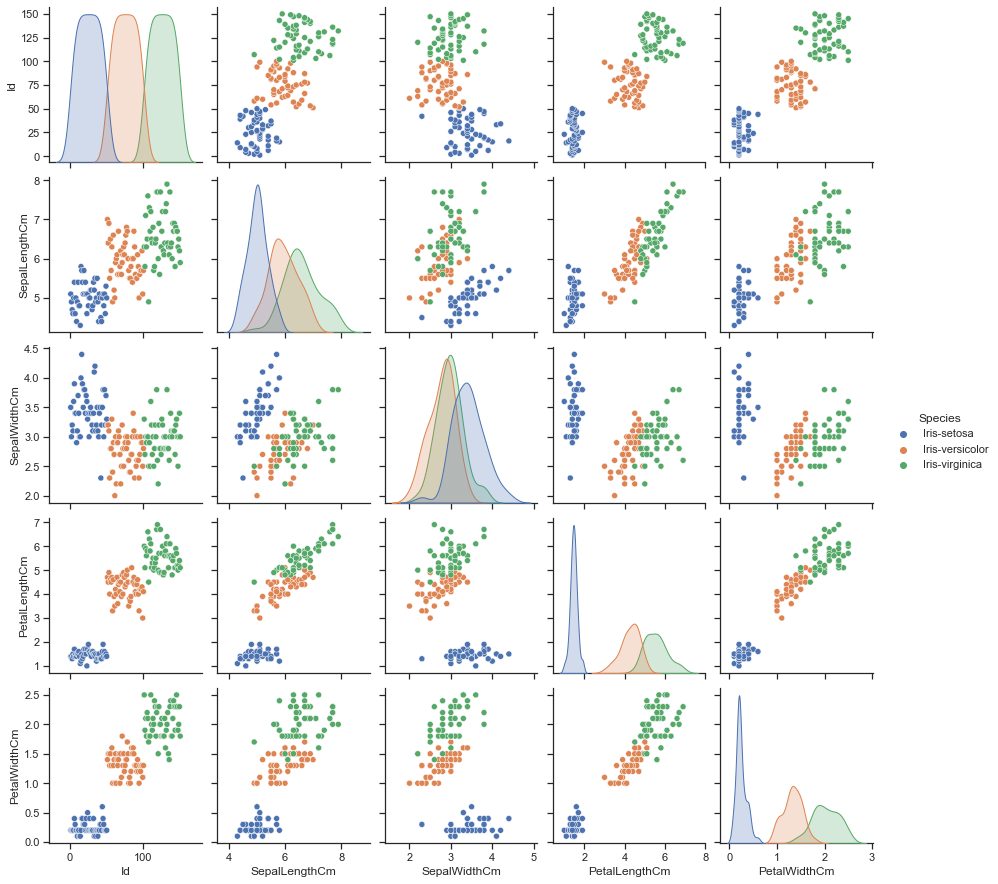

In [17]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(data,hue="Species")

# Heat Map

<AxesSubplot:>

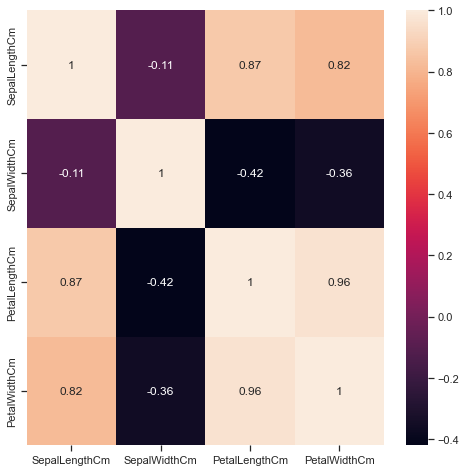

In [18]:
plt.figure(figsize=(8,8))
corre=data_df.corr()
sns.heatmap(corre,annot=True)

# Violion Plot

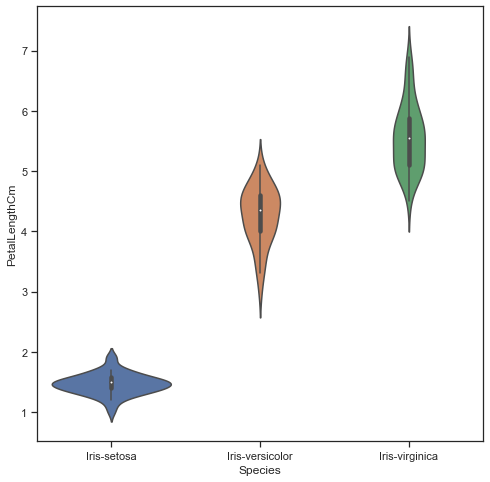

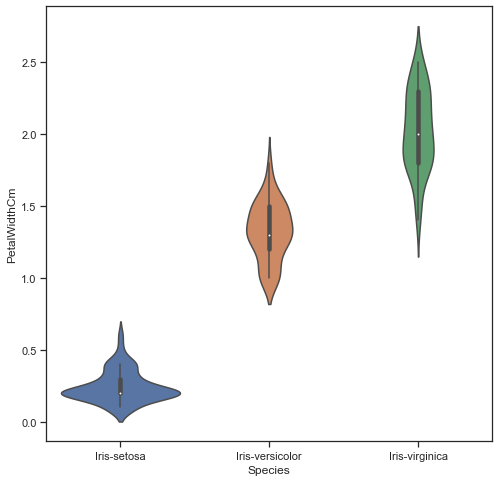

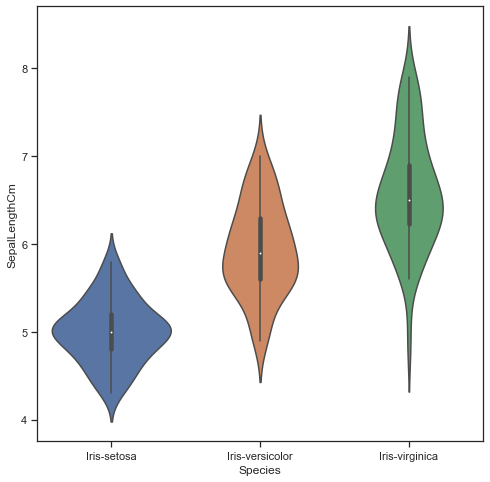

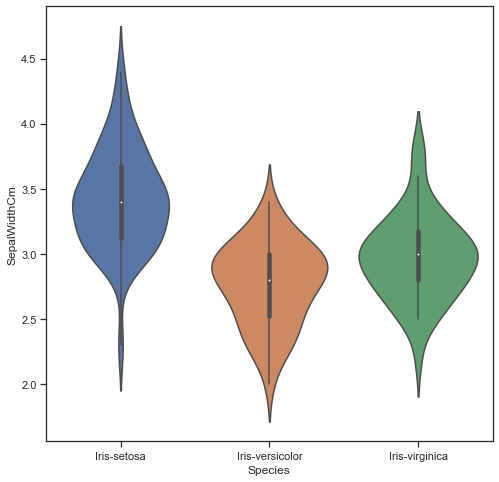

In [39]:
plt.figure(figsize=(8,8))
sns.violinplot(y='PetalLengthCm',x='Species',data=m)
plt.show()

plt.figure(figsize=(8,8))
sns.violinplot(y='PetalWidthCm',x='Species',data=m)
plt.show()

plt.figure(figsize=(8,8))
sns.violinplot(y='SepalLengthCm',x='Species',data=m)
plt.show()

plt.figure(figsize=(8,8))
sns.violinplot(y='SepalWidthCm',x='Species',data=m)
plt.show()

# Building the model

In [19]:
X= data.iloc[:,0:4]
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [20]:
Y = data.iloc[:,-1]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.24,random_state=20)

In [22]:
Y_train.head()

85     Iris-versicolor
1          Iris-setosa
51     Iris-versicolor
130     Iris-virginica
55     Iris-versicolor
Name: Species, dtype: object

In [23]:
type(X_train)

pandas.core.frame.DataFrame

In [24]:
type(Y_train)

pandas.core.series.Series

In [25]:
# Standardized X with the help of StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [26]:
X_train

array([[ 0.25058993,  0.16782396,  0.69731669,  0.41803027],
       [-1.67683912, -1.16414597, -0.20346634, -1.32614799],
       [-0.52955992,  0.65217667,  0.24692517,  0.41803027],
       [ 1.28314121,  1.86305843, -0.65385786,  1.31825131],
       [-0.43777759, -0.19544056, -0.65385786,  0.41803027],
       [ 1.37492354,  0.28891214, -1.10424937,  1.03693224],
       [-0.8507981 , -1.16414597,  0.02172942, -1.26988417],
       [-0.20832175,  1.01544119,  0.02172942,  0.36176646],
       [-0.414832  ,  0.53108849,  0.47212093,  0.5305579 ],
       [-1.65389354, -1.40632232,  0.24692517, -1.3824118 ],
       [-1.58505679, -0.55870509,  1.82329547, -1.15735654],
       [-0.57545109, -1.0430578 ,  0.47212093, -1.32614799],
       [ 0.89306628, -0.19544056, -1.32944513,  0.69934935],
       [-0.69017901, -0.92196962,  1.59809971, -1.04482891],
       [ 1.32903238,  0.65217667, -0.65385786,  1.03693224],
       [ 1.69616172,  0.41000031,  0.69731669,  0.92440461],
       [-0.9884716 , -0.

In [27]:
X_test=scaler.fit_transform(X_test)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)

(114, 4)
(36, 4)
(36,)
(114,)


In [29]:
# Creating a logestic regression model
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [30]:
# Prediction
y_pred=model.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [31]:
print(X_test.shape)
print(y_pred.shape)

(36, 4)
(36,)


In [32]:
# Training accuracy
train_accuracy=model.score(X_train,Y_train)
print("The training accuracy is",train_accuracy)

The training accuracy is 0.9912280701754386


In [33]:
# Test accuracy
test_accuracy=model.score(X_test,Y_test)
print("The testing accuracy is",test_accuracy)

The testing accuracy is 0.9722222222222222


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [35]:
# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

In [36]:
# Fitting the model
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [38]:
accuracy = accuracy_score(Y_test, y_pred)*100
print('Accuracy: ' + str(round(accuracy, 2)) + '%')

Accuracy: 97.22%


# Thank you...!!!